In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
class Perceptron:
    def __init__(self, l_rate = 0.1, n = 100):
        self.n = n
        self.l_rate = l_rate        
    
    def train(self,X,y):
        self.weights = np.zeros(1+ X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n):
            errors = 0
            for xi, target in zip(X, y):
                update = self.l_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                
                if update != 0:
                    errors+=1
                    
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [180]:
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(link, header = None)
y = df.iloc[0:100,4].values

negative_class = -1
positive_class = 1

condition = y == "Iris-setosa"

y = np.where(condition, negative_class, positive_class)

X = df.iloc[0:100, [0,2]].values
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

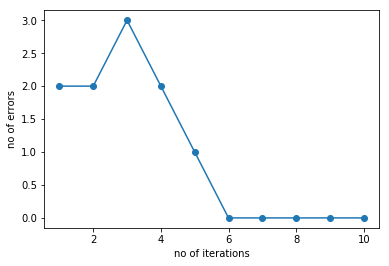

In [181]:
p = Perceptron(l_rate = 0.1, n = 10)

p.train(X,y)

iterations = range(1,len(p.errors_) + 1)

plt.plot(iterations, p.errors_, marker = "o")
plt.xlabel("no of iterations")
plt.ylabel("no of errors")

In [172]:
p.weights

array([-0.4 , -0.68,  1.82])

In [188]:
def plot_classifier(X, y, classifier, resolution=0.02):

    xx1, xx2 = np.meshgrid(np.arange(3,8, resolution), np.arange(0,6, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8) 

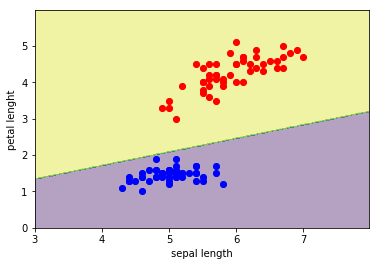

In [189]:
plot_classifier(X, y, p)
X1 = df.iloc[0:50, [0,2]].values
X2 = df.iloc[50:100, [0,2]].values
plt.xlabel('sepal length')
plt.ylabel('petal lenght')
plt.scatter(X1[:,0],X1[:,1], color = "blue")
plt.scatter(X2[:,0],X2[:,1], color = "red")